# Chapter10 - Random Forest & XGB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost

In [2]:
df = pd.read_csv("dataset_demand_forecasting_sd.csv")
df.head()

,Date,Sales
0,2014-01-01,11219
1,2014-01-02,12745
2,2014-01-03,10498
3,2014-01-04,12028
4,2014-01-05,13900


### Feature-Based:

In [3]:
def get_features(dataframe):
    dataframe["sales"] = dataframe["Sales"]
    dataframe["Date"] = pd.to_datetime(dataframe['Date'])
    dataframe['year'] = dataframe.Date.dt.year
    dataframe['month'] = dataframe.Date.dt.month
    dataframe['day'] = dataframe.Date.dt.day
    dataframe['dayofyear'] = dataframe.Date.dt.dayofyear
    dataframe['dayofweek'] = dataframe.Date.dt.dayofweek
    dataframe['weekofyear'] = dataframe.Date.dt.weekofyear
    return dataframe.drop(columns=["Date", "Sales"])


In [4]:
df2 = get_features(df)

<ipython-input-3-3e386bc9c837>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataframe['weekofyear'] = dataframe.Date.dt.weekofyear


In [5]:
df2

,sales,year,month,day,dayofyear,dayofweek,weekofyear
0,11219,2014,1,1,1,2,1
1,12745,2014,1,2,2,3,1
2,10498,2014,1,3,3,4,1
3,12028,2014,1,4,4,5,1
4,13900,2014,1,5,5,6,1
...,...,...,...,...,...,...,...
2542,103271,2020,12,19,354,5,51
2543,100373,2020,12,20,355,6,51
2544,99687,2020,12,21,356,0,52
2545,115992,2020,12,22,357,1,52


In [6]:
X = df2.drop(columns=["sales"])
y = df2.sales

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
X_scaled

array([[-1.49903102e+00, -1.59985075e+00, -1.67110177e+00,
        -1.72703780e+00, -5.00711898e-01, -1.70133522e+00],
       [-1.49903102e+00, -1.59985075e+00, -1.55732443e+00,
        -1.71751942e+00, -5.89072821e-04, -1.70133522e+00],
       [-1.49903102e+00, -1.59985075e+00, -1.44354710e+00,
        -1.70800105e+00,  4.99533752e-01, -1.70133522e+00],
       ...,
       [ 1.50689892e+00,  1.59927982e+00,  6.04444866e-01,
         1.65198576e+00, -1.50095755e+00,  1.69696624e+00],
       [ 1.50689892e+00,  1.59927982e+00,  7.18222197e-01,
         1.66150413e+00, -1.00083472e+00,  1.69696624e+00],
       [ 1.50689892e+00,  1.59927982e+00,  8.31999529e-01,
         1.67102251e+00, -5.00711898e-01,  1.69696624e+00]])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25)

### XGBoost:

In [9]:
model = xgboost.XGBRegressor(n_estimators=1000)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=1000, n_jobs=16, num_parallel_tree=1,
       objective='reg:squarederror', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [10]:
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score

In [12]:
r2_score(y_pred, y_test)

0.8143651849838994

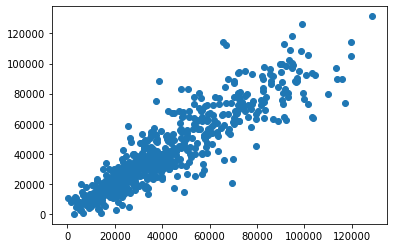

In [13]:
plt.scatter(y_pred, y_test)

### Random Forest:

In [14]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

C:\Users\Saleh Alkhalifa\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [15]:
r2_score(y_pred, y_test)

0.8240802784579871

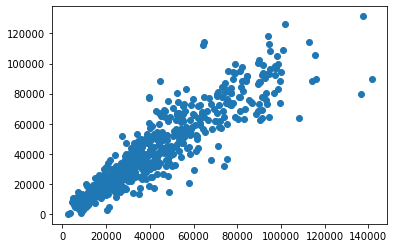

In [16]:
plt.scatter(y_pred, y_test)